In [2]:
# Kevin Hagler 
# 11/1/2022
# Homework 4
#Student ID: 801197095

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.svm import SVR
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore') 

In [4]:
######################
# Problem 1
# Using cancer dataset
######################

In [5]:
cancer = load_breast_cancer()
data = cancer.data
data.shape

(569, 30)

In [6]:
data_input = pd.DataFrame(data)
data_input

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
data_labels = cancer.target
data_labels.shape


(569,)

In [8]:
#creates a matrix of only the lables (malignant or benign) column in 1's and 0's.
labels = np.reshape(data_labels,(569,1))
labels[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [9]:
final_data = np.concatenate([data,labels],axis=1) 
print(final_data.shape)

(569, 31)


In [10]:
dataset = pd.DataFrame(final_data) 
features = cancer.feature_names
features_labels = np.append(features,'label') 
dataset.columns = features_labels 
dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [11]:
#getting x and y values
x = dataset.iloc[:,0:29].values
y = dataset.iloc[:, 30].values


In [12]:
# Splitting data into 80% training and 20% testing/evaluation
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 5)

print("Training Size:",len(x_train))

print("Testing Size:",len(y_test))

Training Size: 455
Testing Size: 114


In [13]:
# standardizing data set 
sc_X = StandardScaler() 
x_train = sc_X.fit_transform(x_train) 
x_test = sc_X.transform(x_test)

from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

Text(0, 0.5, 'Second Component')

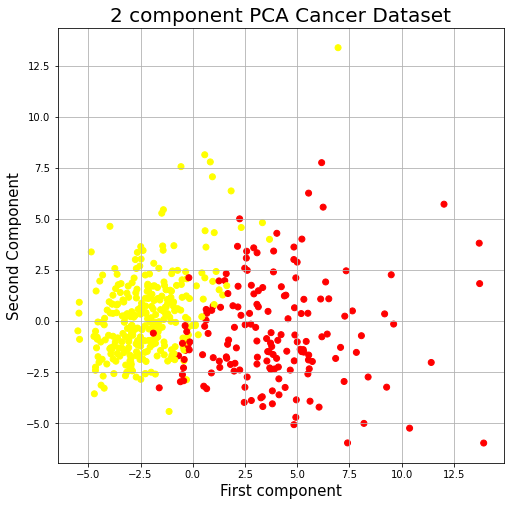

In [14]:
# Graph of the splitted data
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA Cancer Dataset', fontsize = 20) 
plt.grid()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap="autumn")

plt.xlabel('First component')
plt.ylabel('Second Component')

In [15]:
# Linear Support vector classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E5) 
model.fit(x_train, y_train)

SVC(C=100000.0, kernel='linear')

In [16]:
yPred = model.predict(x_test) 
print("Accuracy:",metrics.accuracy_score(y_test, yPred)) 
print("Precision:",metrics.precision_score(y_test, yPred)) 
print("Recall:",metrics.recall_score(y_test, yPred))  

Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 1.0


In [17]:
# Using the polynomial kernel SVM method
model = SVC(kernel='poly', C=1E5) 
model.fit(x_train, y_train)

SVC(C=100000.0, kernel='poly')

In [18]:
yPred = model.predict(x_test) 
print("Accuracy:",metrics.accuracy_score(y_test, yPred)) 
print("Precision:",metrics.precision_score(y_test, yPred)) 
print("Recall:",metrics.recall_score(y_test, yPred))  

Accuracy: 0.8947368421052632
Precision: 0.8461538461538461
Recall: 1.0


In [19]:
# Compairing different k value for polynomial SVC
for i in range (10):
    n=i+1
    pca = PCA(n)
    data = dataset
    data = pca.fit_transform(data)
    xTrain, xTest, yTrain, yTest = train_test_split(data, data_labels, train_size = 0.80, test_size = 0.2, random_state = 0)
    model = SVC(kernel='poly', C=1E5)
    model.fit(xTrain, yTrain)
    prediction =  model.predict(xTest)
   
    print("K:",n)
    print('Accuracy =', metrics.accuracy_score(yTest,prediction))
    print('Recall =', metrics.recall_score(yTest,prediction))
    print('precision =', metrics.precision_score(yTest,prediction))
    

K: 1
Accuracy = 0.8508771929824561
Recall = 1.0
precision = 0.7976190476190477
K: 2
Accuracy = 0.9122807017543859
Recall = 0.8955223880597015
precision = 0.9523809523809523
K: 3
Accuracy = 0.8947368421052632
Recall = 0.8656716417910447
precision = 0.9508196721311475
K: 4
Accuracy = 0.9035087719298246
Recall = 0.8805970149253731
precision = 0.9516129032258065
K: 5
Accuracy = 0.8859649122807017
Recall = 0.8507462686567164
precision = 0.95
K: 6
Accuracy = 0.8947368421052632
Recall = 0.8656716417910447
precision = 0.9508196721311475
K: 7
Accuracy = 0.8947368421052632
Recall = 0.8656716417910447
precision = 0.9508196721311475
K: 8
Accuracy = 0.8947368421052632
Recall = 0.8656716417910447
precision = 0.9508196721311475
K: 9
Accuracy = 0.8947368421052632
Recall = 0.8656716417910447
precision = 0.9508196721311475
K: 10
Accuracy = 0.8947368421052632
Recall = 0.8656716417910447
precision = 0.9508196721311475


In [20]:
# Using the rbf (Radial Basis Function) kernel SVM method
model = SVC(kernel='rbf', C=1E5) 
model.fit(x_train, y_train)

SVC(C=100000.0)

In [21]:
yPred = model.predict(x_test) 
print("Accuracy:",metrics.accuracy_score(y_test, yPred)) 
print("Precision:",metrics.precision_score(y_test, yPred)) 
print("Recall:",metrics.recall_score(y_test, yPred))  

Accuracy: 0.9385964912280702
Precision: 0.9041095890410958
Recall: 1.0


In [22]:
# Compairing different k value for rbf SVC
for i in range (10):
    n=i+1
    pca = PCA(n)
    data = dataset
    data = pca.fit_transform(data)
    xTrain, xTest, yTrain, yTest = train_test_split(data, data_labels, train_size = 0.80, test_size = 0.2, random_state = 0)
    model = SVC(kernel='rbf', C=1E5)
    model.fit(xTrain, yTrain)
    prediction =  model.predict(xTest)
   
    print("K:",n)
    print('Accuracy =', metrics.accuracy_score(yTest,prediction))
    print('Recall =', metrics.recall_score(yTest,prediction))
    print('precision =', metrics.precision_score(yTest,prediction))

K: 1
Accuracy = 0.9298245614035088
Recall = 0.9850746268656716
precision = 0.9041095890410958
K: 2
Accuracy = 0.9385964912280702
Recall = 0.9701492537313433
precision = 0.9285714285714286
K: 3
Accuracy = 0.9210526315789473
Recall = 0.9701492537313433
precision = 0.9027777777777778
K: 4
Accuracy = 0.9649122807017544
Recall = 0.9552238805970149
precision = 0.9846153846153847
K: 5
Accuracy = 0.956140350877193
Recall = 0.9402985074626866
precision = 0.984375
K: 6
Accuracy = 0.9298245614035088
Recall = 0.9104477611940298
precision = 0.9682539682539683
K: 7
Accuracy = 0.9473684210526315
Recall = 0.9253731343283582
precision = 0.9841269841269841
K: 8
Accuracy = 0.9473684210526315
Recall = 0.9253731343283582
precision = 0.9841269841269841
K: 9
Accuracy = 0.9473684210526315
Recall = 0.9253731343283582
precision = 0.9841269841269841
K: 10
Accuracy = 1.0
Recall = 1.0
precision = 1.0


In [23]:
# Using the sigmoid kernel SVM method
model = SVC(kernel='sigmoid', C=1E5) 
model.fit(x_train, y_train)

SVC(C=100000.0, kernel='sigmoid')

In [24]:
yPred = model.predict(x_test) 
print("Accuracy:",metrics.accuracy_score(y_test, yPred)) 
print("Precision:",metrics.precision_score(y_test, yPred)) 
print("Recall:",metrics.recall_score(y_test, yPred))  

Accuracy: 0.8859649122807017
Precision: 0.8533333333333334
Recall: 0.9696969696969697


In [25]:
# Compairing different k value for sigmoid SVC
for i in range (10):
    n=i+1
    pca = PCA(n)
    data = dataset
    data = pca.fit_transform(data)
    xTrain, xTest, yTrain, yTest = train_test_split(data, data_labels, train_size = 0.80, test_size = 0.2, random_state = 0)
    model = SVC(kernel='sigmoid', C=1E5)
    model.fit(xTrain, yTrain)
    prediction =  model.predict(xTest)
   
    print("K:",n)
    print('Accuracy =', metrics.accuracy_score(yTest,prediction))
    print('Recall =', metrics.recall_score(yTest,prediction))
    print('precision =', metrics.precision_score(yTest,prediction))

K: 1
Accuracy = 0.8596491228070176
Recall = 0.8208955223880597
precision = 0.9322033898305084
K: 2
Accuracy = 0.868421052631579
Recall = 0.8208955223880597
precision = 0.9482758620689655
K: 3
Accuracy = 0.868421052631579
Recall = 0.8208955223880597
precision = 0.9482758620689655
K: 4
Accuracy = 0.868421052631579
Recall = 0.8208955223880597
precision = 0.9482758620689655
K: 5
Accuracy = 0.868421052631579
Recall = 0.8208955223880597
precision = 0.9482758620689655
K: 6
Accuracy = 0.868421052631579
Recall = 0.8208955223880597
precision = 0.9482758620689655
K: 7
Accuracy = 0.8859649122807017
Recall = 0.8805970149253731
precision = 0.921875
K: 8
Accuracy = 0.868421052631579
Recall = 0.8208955223880597
precision = 0.9482758620689655
K: 9
Accuracy = 0.868421052631579
Recall = 0.8208955223880597
precision = 0.9482758620689655
K: 10
Accuracy = 0.868421052631579
Recall = 0.8208955223880597
precision = 0.9482758620689655


In [26]:
#######################
# Problem 2
# Using housing dataset
#######################

In [41]:
housing = pd.read_csv("housing.csv")
housing = housing.drop('furnishingstatus', axis=1)
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no
541,1767150,2400,3,1,1,no,no,no,no,no,0,no
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no
543,1750000,2910,3,1,1,no,no,no,no,no,0,no


In [42]:
# map functioin for 1 being yes and 0 being no.
varList = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binaryMap(x):
    return x.map({'yes': 1, 'no': 0})

housing[varList] = housing[varList].apply(binaryMap)
print(housing.shape)
housing.head()

(545, 12)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [43]:
data_input = pd.DataFrame(housing)
x = housing.iloc[:,1:12].values
y = housing.iloc[:,0].values
print(y[:5])
print(x[:5])
y.shape


[13300000 12250000 12250000 12215000 11410000]
[[7420    4    2    3    1    0    0    0    1    2    1]
 [8960    4    4    4    1    0    0    0    1    3    0]
 [9960    3    2    2    1    0    1    0    0    2    1]
 [7500    4    2    2    1    0    1    0    1    3    1]
 [7420    4    1    2    1    1    1    0    1    2    0]]


(545,)

In [44]:
# Standardizing the housing dataset
x_st = StandardScaler().fit_transform(x) 
print(y.shape, x.shape)
x = x_st

(545,) (545, 11)


In [45]:
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, test_size = 0.2, random_state = 0)

print("Training Size:",len(x_train))
print("Testing Size:",len(y_test))


Training Size: 436
Testing Size: 109


In [46]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x) 
principal_housing = pd.DataFrame(data = principalComponents, columns = ['principal component 1']) 
final_housing = pd.concat([principal_housing, housing[['price']]], axis = 1) 
print(final_housing.shape)
final_housing


(545, 2)


,principal component 1,price
0,3.264248,13300000
1,5.194952,12250000
2,2.460935,12250000
3,3.625400,12215000
4,2.502535,11410000
...,...,...
540,-1.078671,1820000
541,-2.533313,1767150
542,-2.063004,1750000
543,-2.441185,1750000


In [47]:
x = final_housing.iloc[:, [0]]
y = final_housing.iloc[:, [1]]
print(x)
print()
print(y)
print(x.shape)
print(y.shape)

     principal component 1
0                 3.264248
1                 5.194952
2                 2.460935
3                 3.625400
4                 2.502535
..                     ...
540              -1.078671
541              -2.533313
542              -2.063004
543              -2.441185
544              -1.140103

[545 rows x 1 columns]

        price
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
..        ...
540   1820000
541   1767150
542   1750000
543   1750000
544   1750000

[545 rows x 1 columns]
(545, 1)
(545, 1)


In [48]:
# Fitting regrseeion model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_lin = SVR(kernel='linear', C=1e3) 
svr_poly = SVR(kernel='poly', C=1e3, degree=3) 
y_rbf = svr_rbf.fit(x, y).predict(x) 
y_linear = svr_lin.fit(x, y).predict(x) 
y_poly = svr_poly.fit(x, y).predict(x) 

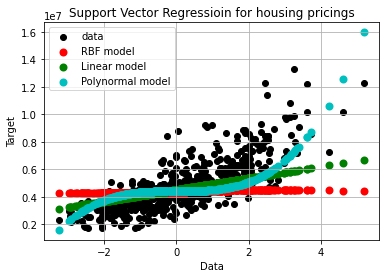

In [49]:
# Compairing different kernal tricks
lw = 2
plt.scatter(x, y, color = 'black', label = 'data')
plt.scatter(x, y_rbf, color = 'red', lw=lw, label = 'RBF model')
plt.scatter(x, y_linear, color = 'green', lw=lw, label = 'Linear model')
plt.scatter(x, y_poly, color = 'c', lw=lw, label = 'Polynormal model')
plt.grid()
plt.ylabel('Target')
plt.xlabel('Data')
plt.title('Support Vector Regressioin for housing pricings')
plt.legend()
plt.show()


In [58]:
from sklearn.decomposition import PCA
for i in range (1):
    n=i+1
    pca = PCA(n)
    housing2 = housing
    housing2 = pca.fit_transform(housing2)
    xTrain, xTest, yTrain, yTest = train_test_split(housing2, housing.price, train_size = 0.80, test_size = 0.2, random_state = 0)
    model = SVC(kernel='poly', C=1E5) 
    model.fit(xTrain,yTrain)
    prediction =  model.predict(xTrain)
    print('Accuracy')
    print('Polynormal:', metrics.accuracy_score(yTrain,prediction))
    model = SVC(kernel='linear', C=1E5) 
    model.fit(xTrain,yTrain)
    prediction =  model.predict(xTrain)
    print('linear:', metrics.accuracy_score(yTrain,prediction))
    model = SVC(kernel='rbf', C=1E5) 
    model.fit(xTrain,yTrain)
    prediction =  model.predict(xTrain)
    print('rbf:', metrics.accuracy_score(yTrain,prediction))
   
   

Accuracy
Polynormal: 0.8922018348623854
linear: 1.0
rbf: 0.9977064220183486
